In [22]:
'''
VARIABLE: METHOD OF DR


'''

'\nVARIABLE: METHOD OF DR\n\nCONSTANT: N_EPOCHS, N_COMPONENTS, NOISE TYPE AND MAGNITUDE\n          (30)      (30)          (SPECKLE, std=10)\n\n'

In [23]:
# -- IMPORTS -- #
import math
import scipy
import numpy as np
from skimage import util
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [24]:
# -- TRAIN AND TEST DATA PREPARATION -- #
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_noisy = np.empty((len(x_test),28,28),dtype="float64")

std = 0.1
for i in range(len(x_test)):
    x_test_noisy[i] = util.random_noise(x_test[i],mode="gaussian",var=std**2)

25.023887949131005


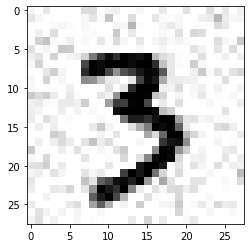

In [25]:
# -- OUTPUT SNR AND SAMPLE NOISY IMAGE -- #
p_signal = np.mean(x_test[30])
p_noise = std
snr = 10 * math.log(p_signal/p_noise,10)
print(snr)

plt.imshow(x_test_noisy[30],cmap=plt.cm.binary)
plt.show()

In [18]:
# -- CONVERTING DATA FOR INPUT INTO NEURAL NETWORK -- #
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype("float32") / 255

x_test = x_test.reshape((10000,28*28))
x_test_noisy = x_test_noisy.reshape((10000,28*28))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
# -- DIMENSIONALITY REDUCTION -- #
import dim_reduction
x_train0, x_test_noisy0 = x_train.copy(), x_test_noisy.copy()
x_train1, x_test_noisy1 = dim_reduction.apply(30, x_train, x_test_noisy, "PCA")
x_train2, x_test_noisy2 = dim_reduction.apply(30, x_train, x_test_noisy, "FA")

C:\Users\Carl\.conda\envs\tf\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [20]:
# -- NEURAL NETWORK -- #
import neural_network
history0 = neural_network.fit(784, 30, x_train0, y_train, x_test_noisy0, y_test)
history1 = neural_network.fit(30, 30, x_train1, y_train, x_test_noisy1, y_test)
history2 = neural_network.fit(30, 30, x_train2, y_train, x_test_noisy2, y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 11us/step - loss: 1.6177 - accuracy: 0.5932 - val_loss: 1.4824 - val_accuracy: 0.6804
Epoch 2/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.8060 - accuracy: 0.8284 - val_loss: 0.9784 - val_accuracy: 0.7984
Epoch 3/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.5208 - accuracy: 0.8738 - val_loss: 0.7606 - val_accuracy: 0.8331
Epoch 4/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.4133 - accuracy: 0.8931 - val_loss: 0.6557 - val_accuracy: 0.8482
Epoch 5/30
60000/60000 [==============================] - 1s 10us/step - loss: 0.3599 - accuracy: 0.9034 - val_loss: 0.6017 - val_accuracy: 0.8567
Epoch 6/30
60000/60000 [==============================] - 1s 9us/step - loss: 0.3275 - accuracy: 0.9112 - val_loss: 0.5630 - val_accuracy: 0.8635
Epoch 7/30
60000/60000 [==============================] - 1s 9us/step - 

60000/60000 [==============================] - 0s 4us/step - loss: 0.1954 - accuracy: 0.9416 - val_loss: 0.3851 - val_accuracy: 0.8915
Epoch 27/30
60000/60000 [==============================] - 0s 4us/step - loss: 0.1918 - accuracy: 0.9424 - val_loss: 0.3803 - val_accuracy: 0.8935
Epoch 28/30
60000/60000 [==============================] - 0s 3us/step - loss: 0.1884 - accuracy: 0.9434 - val_loss: 0.3769 - val_accuracy: 0.8955
Epoch 29/30
60000/60000 [==============================] - 0s 3us/step - loss: 0.1850 - accuracy: 0.9442 - val_loss: 0.3721 - val_accuracy: 0.8969
Epoch 30/30
60000/60000 [==============================] - 0s 4us/step - loss: 0.1819 - accuracy: 0.9454 - val_loss: 0.3696 - val_accuracy: 0.8971
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 0s 5us/step - loss: 2.1874 - accuracy: 0.2087 - val_loss: 2.1087 - val_accuracy: 0.3023
Epoch 2/30
60000/60000 [==============================] - 0s 4us/step - loss: 1.8

Epoch 21/30
60000/60000 [==============================] - 0s 3us/step - loss: 2.2088 - accuracy: 0.4117 - val_loss: 2.2360 - val_accuracy: 0.2702
Epoch 22/30
60000/60000 [==============================] - 0s 3us/step - loss: 2.2010 - accuracy: 0.4689 - val_loss: 2.2306 - val_accuracy: 0.2821
Epoch 23/30
60000/60000 [==============================] - 0s 3us/step - loss: 2.1930 - accuracy: 0.4845 - val_loss: 2.2251 - val_accuracy: 0.3076
Epoch 24/30
60000/60000 [==============================] - 0s 4us/step - loss: 2.1846 - accuracy: 0.5220 - val_loss: 2.2192 - val_accuracy: 0.3116
Epoch 25/30
60000/60000 [==============================] - 0s 4us/step - loss: 2.1759 - accuracy: 0.5316 - val_loss: 2.2132 - val_accuracy: 0.3549
Epoch 26/30
60000/60000 [==============================] - 0s 4us/step - loss: 2.1668 - accuracy: 0.5734 - val_loss: 2.2069 - val_accuracy: 0.3394
Epoch 27/30
60000/60000 [==============================] - 0s 4us/step - loss: 2.1576 - accuracy: 0.5633 - val_loss: 2

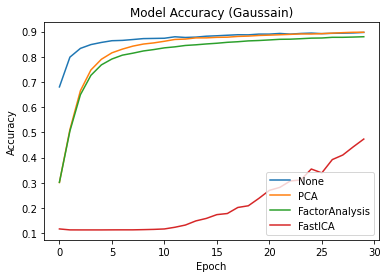

In [21]:
# -- OUTPUT PLOTS -- #
plt.plot(history0.history["val_accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.plot(history3.history["val_accuracy"])
plt.title("Model Accuracy (Gaussain)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["None", "PCA", "FA"],loc="lower right")
plt.show()